#텐서 조작하기
- Yeongmin Ko, 2023/09/20

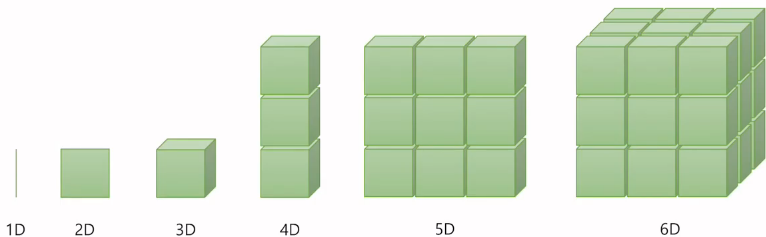

### 벡터: rank=1
### 행렬: rank=2
### 텐서: rank = 3(In data science, rank >= 3)

## 2D Tensor
- |t| = (Batch size, dim)
- 행의 크기: batch size, 열의 크기: dim

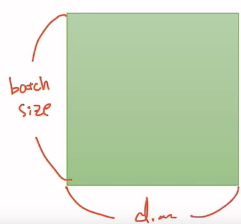

가령 훈련 데이터 하나의 크기가 256이라 가정하자. 즉, [1, 2, 3, ..., 256]이렇게 나열된 배열이 있다고 생각하면 된다. 이런 훈련 데이터의 개수가 3,000개라고 한다면, 현재 전체 훈련 데이터의 크기는 3,000 x 256이고 행렬이니까 2D 텐서이다.<br>
물론 3,000개를 1개씩 꺼내서 처리하는 것도 가능하지만 컴퓨터에서는 보통 덩어리(batch)로 처리하는데, 이때 만약 64개씩 처리한다고 하면 batch size는 64이다. 그렇다면 컴퓨터가 한 번 처리하는 2D 텐서의 크기는 (batch size x dim) = 64x256이다.

## 3D Tensor - 비전 분야에서 사용
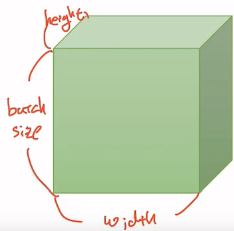

비전 분야(이미지, 영상 처리)를 하게 된다면 2D 텐서가 아닌 조금 더 복잡한 텐서를 다루게 된다. 이미지는 가로와 세로가 존재하고 여러 장의 이미지가 존재하게 된다면 위 그림과 같이 3차원의 텐서가 된다.
- |t| = (Batch size, width, height)
- 세로: batch size, 가로: 너비(width), 안쪽: 높이(height)

In [2]:
import numpy as np

t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [4]:
print(f'rank of t: {t.ndim}') # 1차원
print(f'shape of t: {t.shape}') # 1x7

rank of t: 1
shape of t: (7,)


In [5]:
# indexing
print(f't[0] t[1] t[-1] = {t[0]}, {t[1]}, {t[-1]}')

t[0] t[1] t[-1] = 0.0, 1.0, 6.0


In [7]:
# slicing
print(f't[2:5] t[4:-1] = {t[2:5]}, {t[4:-1]}')
print(f't[:2] t[3:] = {t[:2]}, t[3:]')

t[2:5] t[4:-1] = [2. 3. 4.], [4. 5.]
t[:2] t[3:] = [0. 1.], t[3:]


In [8]:
t = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.],
              [10., 11., 12.]])

In [10]:
print(f'rank of t: {t.ndim}')
print(f'shape of t: {{t.shape}}')

rank of t: 2
shape of t: {t.shape}


## 파이토치 텐서 선언하기

In [11]:
import torch

### 1) 1D with PyTorch

In [12]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [15]:
print(t.dim()) # rank
print(t.shape) # shape
print(t.size()) # shape == size() , shape is attribute, size is function

1
torch.Size([7])
torch.Size([7])


In [18]:
# indexing & slicing
print(t[0], t[-1], t[3]) # indexing
print(t[0:3]) # slicing
print(t[-3:-1]) # slicing
print(t[2:-1])

tensor(0.) tensor(6.) tensor(3.)
tensor([0., 1., 2.])
tensor([4., 5.])
tensor([2., 3., 4., 5.])


### 2) 2D with PyTorch

In [19]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]])

print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [21]:
print(t.dim()) # rank == dimension
print(t.size()) # shape

2
torch.Size([4, 3])


In [26]:
print(t[:, -1]) # 행은 전체, 마지막 열(3, 6, 9, 12)
print(t[:, 0]) # 행은 전체, 첫 번째 열(1, 4, 7, 10)
print(t[0, :]) # 첫 번째 행, 전체 열(1, 2, 3)
print(t[-1, :]) # 마지막 행, 전체 열(10, 11, 12)

tensor([ 3.,  6.,  9., 12.])
tensor([ 1.,  4.,  7., 10.])
tensor([1., 2., 3.])
tensor([10., 11., 12.])


### 3) Broadcasting: 연산할 수 있도록 자동으로 행렬의 크기를 맞춰주는 것
- 행렬을 덧셈할 때 행렬 간의 크기가 같아야 함
- 행렬을 곱할 때에는 A의 마지막 차원과 B의 첫 번째 차원이 같아야 함
- 이때, 자동으로 크기를 맞춰서 연산을 수행하도록 하는 기능이 브로드캐스팅

In [28]:
# same size
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1, m2)
print(m1 + m2)

tensor([[3., 3.]]) tensor([[2., 2.]])
tensor([[5., 5.]])


In [32]:
# different size
# ex: Vector + Scalar
m1 = torch.FloatTensor([[1, 2]]) # Row Vector
m2 = torch.FloatTensor([[3]]) # Scalar
print(m1, m2)

print(m1 + m2)
# 어떻게 연산이 가능한가? -> m2가 자동으로 [3, 3]으로 브로드캐스팅
m3 = torch.FloatTensor([[3, 3]])
print(m1 + m3)

tensor([[1., 2.]]) tensor([[3.]])
tensor([[4., 5.]])
tensor([[4., 5.]])


In [35]:
# 2x1 Row Vector + 1x2 Row Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1, m2)
print(m1 + m2)
# 두 벡터의 크기를 모두 2x2로 브로드캐스팅
# how broadcasting?
# [1, 2]
# ==> [[1, 2],
#      [1, 2]]
# [3]
# [4]
# ==> [[3, 3],
#      [4, 4]]

tensor([[1., 2.]]) tensor([[3.],
        [4.]])
tensor([[4., 5.],
        [5., 6.]])


### 주의
- 브로드캐스팅은 편리하지만, 자동으로 실행되는 기능이므로 굉장히 주의해서 사용해야 함
- 브로드캐스팅은 자동으로 수행되므로 사용자는 나중에 원하는 결과가 나오지 않았더라도 어디서 문제가 발생했는지 찾기 매우 어려움

## 자주 사용되는 기능들
#### 1) 행렬 곱셈과 곱셈의 차이
- 행렬 곱셈: matmul()
- 원소별 곱셈: mul()
  - 원소별 곱셈의 이름은 'element-wise 곱셈'

In [39]:
# 행렬 곱셈
m1 = torch.FloatTensor([[1, 2],
                        [3, 4]])
print(m1)
m2 = torch.FloatTensor([[1],
                        [2]])
print(m2)

print(f'Shape of Matrix 1: {m1.shape}') # 2 x 2
print(f'Shape of Matrix 2: {m2.shape}') # 2 x 1
print(m1.matmul(m2)) # 2 x 1 (because (2x2) x (2x1))

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.]])
Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


- 행렬 곱셈이 아니라 element-wise 곱셈이라는 것이 존재하는데, 이는 동일한 크기의 행렬이 동일한 위치에 있는 원소끼리 곱하는 것이다.
- 아래 코드는 element-wize 곱셈이 수행되는 과정을 나타내는데, 서로 다른 크기의 행렬이 브로드캐스팅이 된 후에 연산을 수행한다.

In [43]:
# element-wise 곱셈
m1 = torch.FloatTensor([[1, 2],
                        [3, 4]])
print(m1)
m2 = torch.FloatTensor([[1],
                        [2]])
print(m2)

print(f'Shape of Matrix 1: {m1.shape}') # 2 x 2
print(f'Shape of Matrix 2: {m2.shape}') # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2

############################################################
m3 = torch.FloatTensor([[1, 2],
                        [3, 4]])
m4 = torch.FloatTensor([[1, 1],
                        [2, 2]])
print(m3 * m4)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.]])
Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


#### 2) 평균(Mean)
- mean(): 모든 원소에 대해서 합하고 원소의 갯수로 나눔

In [45]:
t = torch.FloatTensor([1, 2])
print(t.mean()) # 1 + 2 / 2 = 1.5

tensor(1.5000)


In [46]:
t = torch.FloatTensor([[1, 2],
                       [3, 4]])
print(t)
print(t.mean()) # 1+2+3+4 / 4 = 2.5

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)


In [65]:
print(t.mean(dim=0)) # 인자로 dim을 준다면 해당 차원을 제거한다는 의미이다.
# 위의 경우 첫 번째 차원을 제거한다는 것이다. 즉, 행x열로 이루어져 있을 때 행을 지우고 열의 차원만을 남긴다는 것이다.
# 이 경우 텐서에 대해서 열의 차원은 보존이 되고 1X2 행렬이 된다.
# 이것들의 평균을 구하면 아래와 같이 된다.
# 1과 3의 평균을 구하고, 2와 4의 평균을 구한다.

tensor([2., 3.])


In [66]:
# 그렇다면 열의 차원을 제거하려면 두 번째 차원을 제거하는 것이므로 당연히 dim=1 을 인자값으로 주면 된다.
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


In [70]:
print(t.mean(dim=-1)) # -1의 경우 마지막 차원을 제거하는 것이므로 행X열에서 열을 제거한다는 것이다.

tensor([1.5000, 3.5000])


#### 3) 덧셈(Sum)
- sum(): 연산 방법과 인자가 의미하는 바가 평균과 정확히 동일하지만 곱셈이 아니라 덧셈이라는 점만 다르다.

In [71]:
print(t.sum())

tensor(10.)


In [72]:
print(t.sum(dim=0)) # 행 제거
print(t.sum(dim=1)) # 열 제거
print(t.sum(dim=-1)) # 열 제거

tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


#### 4) 최대(Max)와 아그맥스(ArgMax)
- max(): 원소의 최댓값을 리턴
- argmax(): 최댓값을 가진 인덱스를 리턴

In [76]:
t = torch.FloatTensor([[1, 2],
                       [3, 4]]) # 2x2 Tensor(matrix)
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [80]:
print(t.max())
print(t.max(dim=0)) # 첫 번째 차원을 제거(행의 차원 제거) ~ 1x2 Tensor(열 벡터)를 만듦.
# 결과는 각 열에서의 최댓값 [3, 4]

print()
print(f'Max: {t.max(dim=0)[0]}')
print(f'Argax: {t.max(dim=0)[1]}')

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))

Max: tensor([3., 4.])
Argax: tensor([1, 1])


In [75]:
print(t.argmax())

tensor(3)


Reference
- https://wikidocs.net/52460